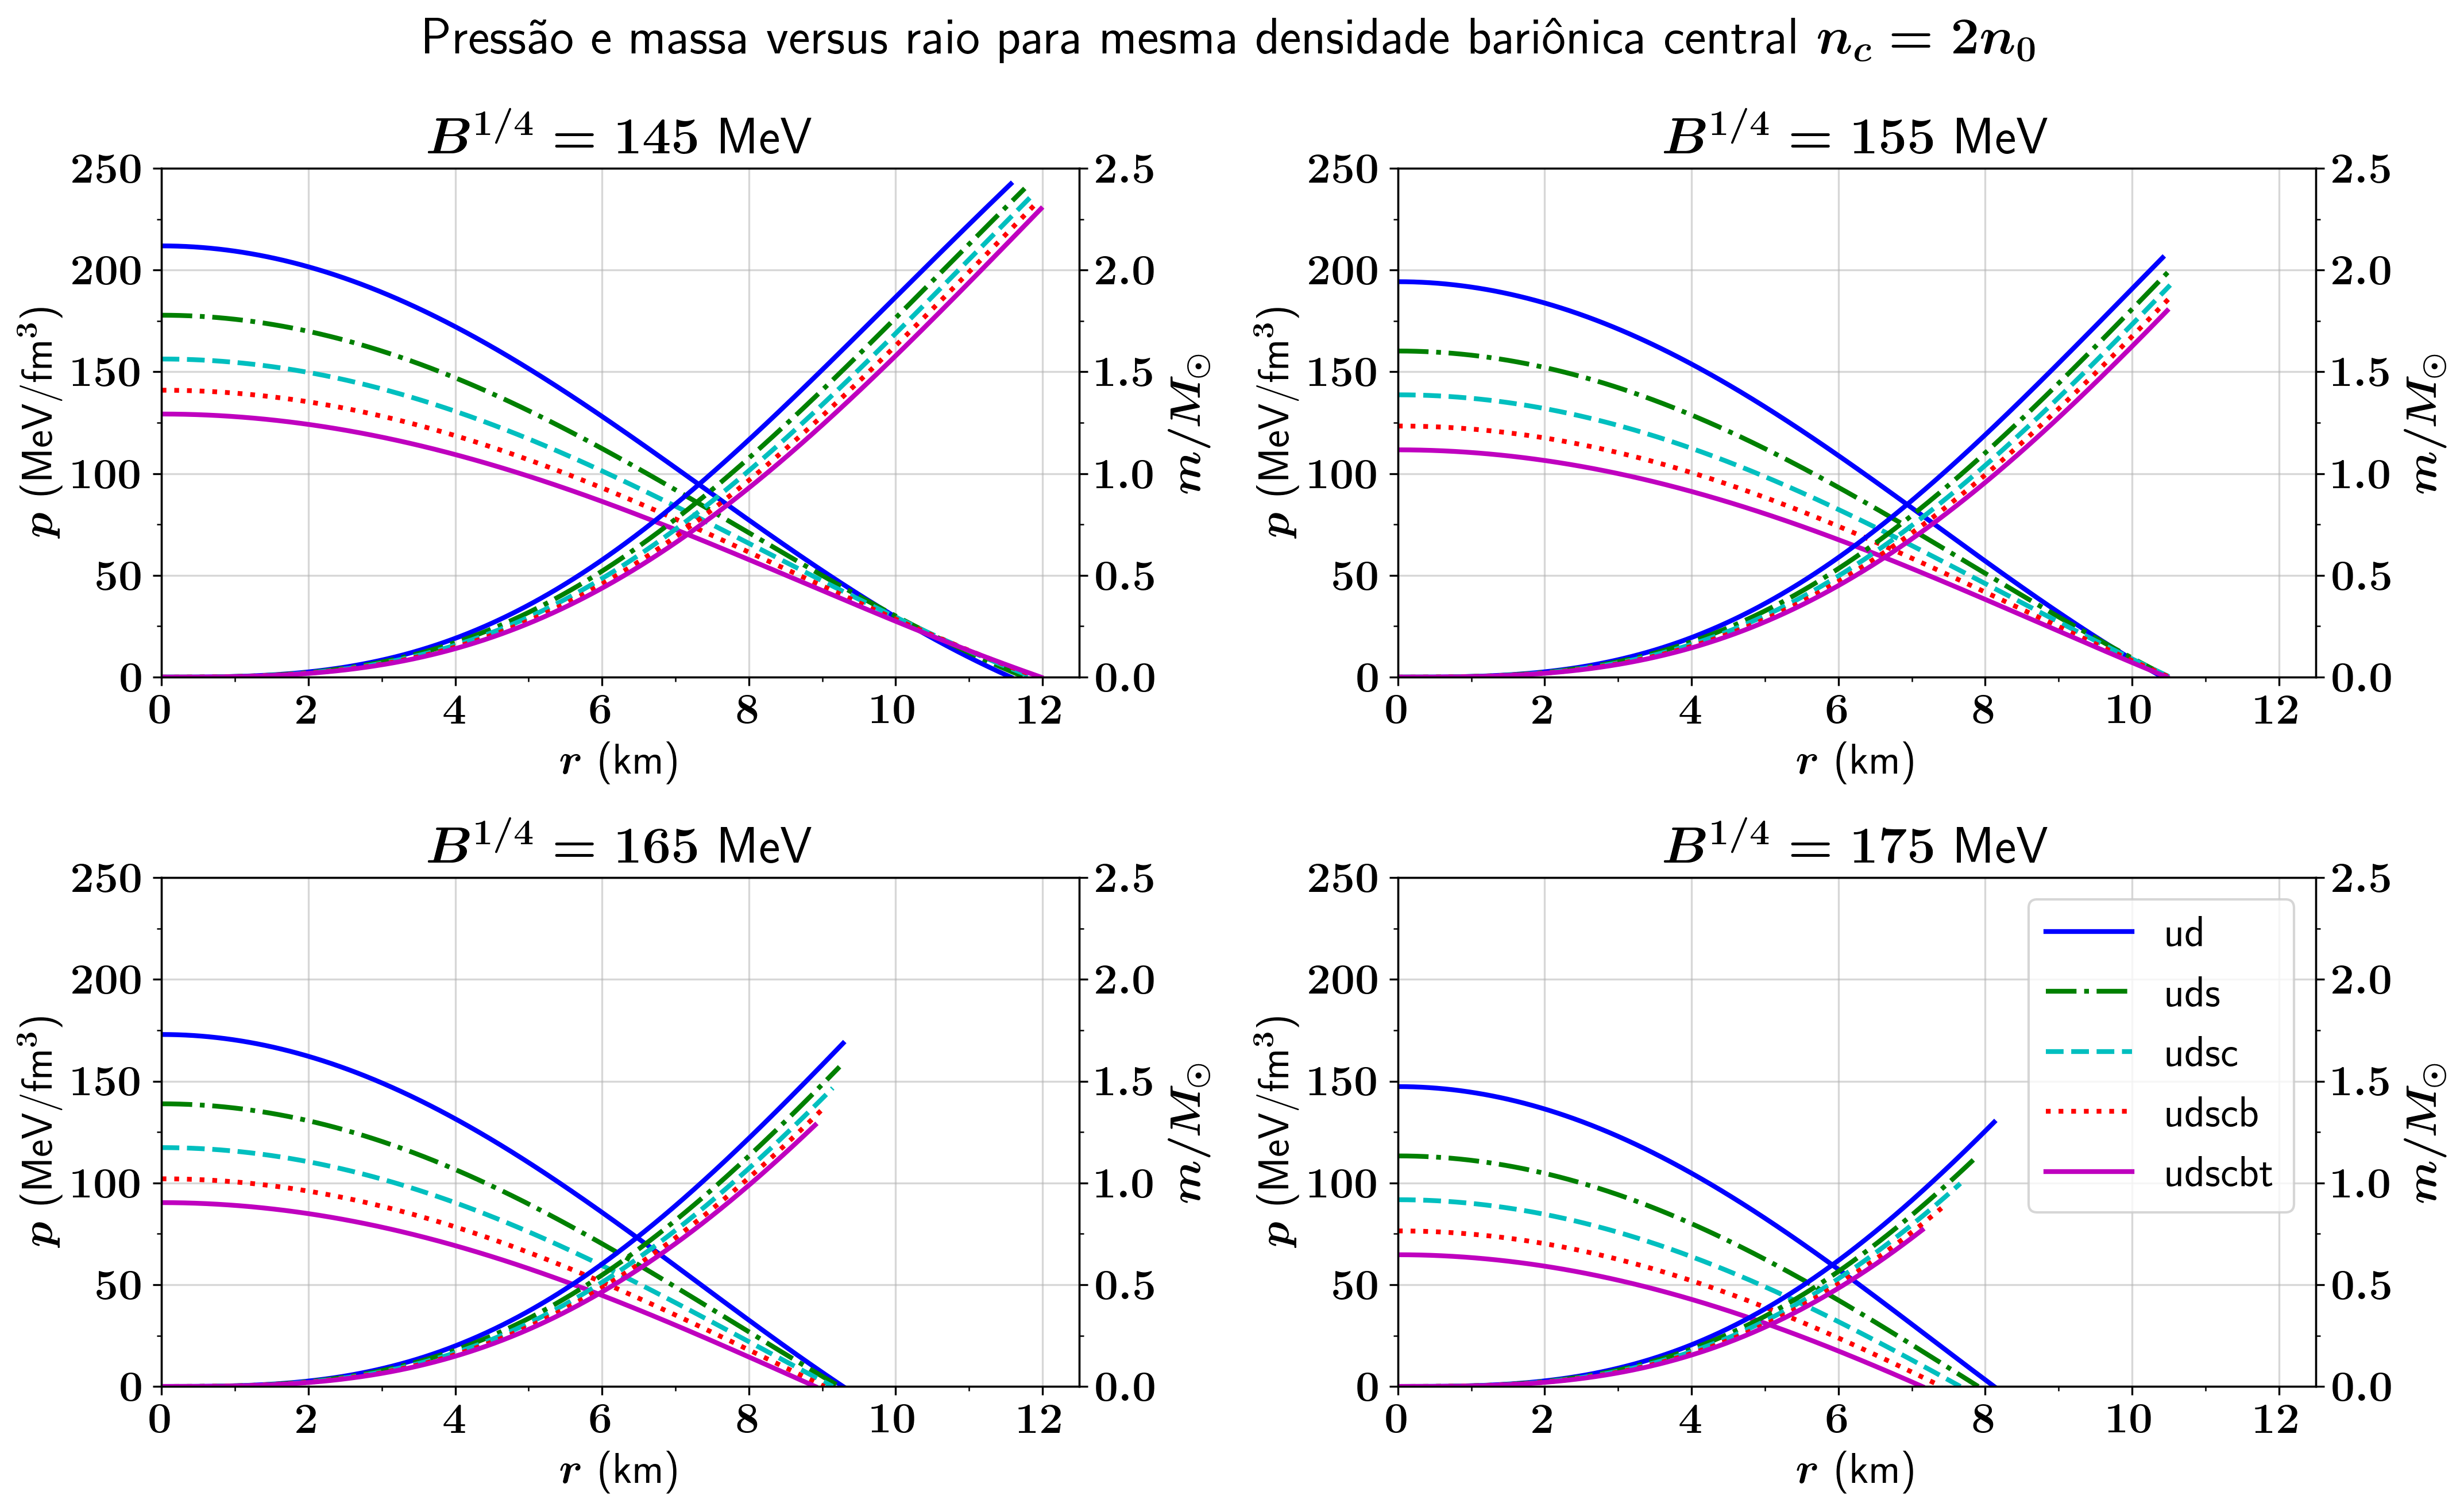

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\boldmath'
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = [14.6, 9]
plt.rcParams['figure.dpi'] = 300

fig, ax1 = plt.subplots(2,2)
#-------------------------------------------------------
bagPressures = []
bagPressures.append(145)
bagPressures.append(155)
bagPressures.append(165)
bagPressures.append(175)
titles = []
titles.append('ud')
titles.append('uds')
titles.append('udsc')
titles.append('udscb')
titles.append('udscbt')
dirs = []
for bP in bagPressures:
    for i in titles:
        dirs.append('../cpp/output/' + i + 'B' + str(bP) +'.dat')
#print(dirs)
cols = []
cols.append('b')
cols.append('g-.')
cols.append('c--')
cols.append('r:')
cols.append('m')

for j in range(2):
    for k in range(2):
        x = []
        ax1[j][k].set_title("$B^{1/4} = "+ str(bagPressures[k+j*2]) +"$ MeV")
        ax1[j][k].set_xlabel(r'$r$ (km)')
        ax1[j][k].set_ylabel(r'$p$ (MeV/fm$^3$)')
        ax1[j][k].set_xlim([0,12.5])
        ax1[j][k].xaxis.set_major_locator(MultipleLocator(2))
        ax1[j][k].xaxis.set_minor_locator(MultipleLocator(1))
        ax1[j][k].yaxis.set_major_locator(MultipleLocator(50))
        ax1[j][k].yaxis.set_minor_locator(MultipleLocator(25))
        ax1[j][k].set_ylim([0,250])
        ax2 = ax1[j][k].twinx()
        ax2.set_ylabel(r'$m/M_\odot$')
        ax2.set_ylim([0,2.5])
        ax2.yaxis.set_major_locator(MultipleLocator(0.5))
        ax2.yaxis.set_minor_locator(MultipleLocator(0.25))
            
        for i in range(5):
            x.append([])
            with open(dirs[i+k*5+j*10], 'r') as f:   
                #print(dirs[i+k*5+j*10])
                lines = f.readlines()
                x[i].append([float(line.split()[0]) for line in lines])
                x[i].append([float(line.split()[1]) for line in lines])
                x[i].append([float(line.split()[2]) for line in lines])
    
            ax1[j][k].grid(True, alpha=0.5)
            ax1[j][k].plot(x[i][0],x[i][1], cols[i], label=titles[i],linewidth=2)
            ax2.plot(x[i][0],x[i][2], cols[i],linewidth=2)

fig.suptitle("Pressão e massa versus raio para densidade bariônica central $n_c = 2n_0$")
fig.tight_layout(pad=1)
ax1[1][1].legend(loc='upper right')
plt.show()